In [26]:
%config Application.log_level='INFO'
import logging
logging.getLogger().setLevel(logging.INFO)
log = logging.getLogger()

In [1]:
%load_ext autoreload

In [12]:
%autoreload 2

In [28]:
import model_opt

I0214 14:33:26.653067 140680182429504 model_opt.py:55] Loading data
I0214 14:33:26.654973 140680182429504 model_opt.py:60] 1581687206
I0214 14:33:27.270828 140680182429504 model_opt.py:124] Creating model
I0214 14:33:27.914760 140680182429504 model_opt.py:187] Start Training
I0214 14:33:45.783409 140680182429504 model_opt.py:190] Saving training metadata


[0.530925426254023, 0.6470368131394975]


<Figure size 432x288 with 0 Axes>

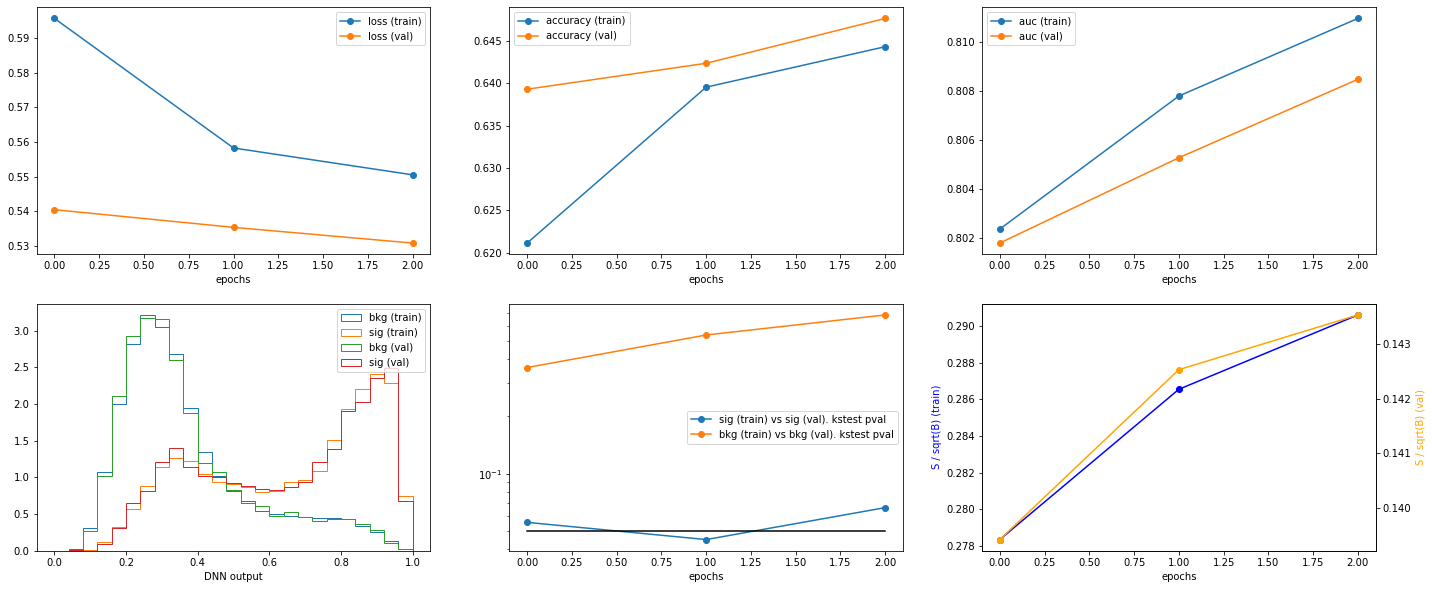

In [41]:
ev = model_opt.test_vbsdnn_model()
print(ev)

## GPyOpt

In [62]:
# !pip3 install --user gpyopt

import GPyOpt

In [80]:
config = {
    "base_dir":        "/eos/home-d/dmapelli/public/latino/",
    "plot_config":     "Full2018v6s5",
    "cut":             "boos_sig_mjjincl",
    "samples_version": "v10",
    "cols": ['mjj_vbs', 'vbs_0_pt', 'vbs_1_pt', 'deltaeta_vbs', 'deltaphi_vbs', 
        'mjj_vjet', 'vjet_0_pt', 'vjet_1_pt', 'vjet_0_eta', 'vjet_1_eta', 
        'Lepton_pt', 'Lepton_eta', 'Lepton_flavour', 
        'PuppiMET', 
        'Zvjets_0', 'Zlep', 
        'Asym_vbs', 'Asym_vjet', 'A_ww', 
        'Mtw_lep', 'w_lep_pt', 'Mww', 'R_ww', 'R_mw', 
        'Centr_vbs', 'Centr_ww'
        ]
}
    
bounds = [{'name': 'test_ratio', 'type': 'discrete',  'domain': (0.1, 0.2)},
          {'name': 'batch_size', 'type': 'discrete',  'domain': (128, 256, 512, 1024)},]

fixed_params={
    "input_dim": len(config["cols"]),
    "dense_outs": (50,80,50),
    "dense_drop": (0.3,0.3,0.3),
    #"batch_size": 1024,
    "epochs": 3,
    "val_ratio": 0.0
}
#dense_outs=(50,80,50)
#dense_drop=(0.3,0.3,0.3)

In [81]:
## optimizer function
def f(x):
    print(x)
    ev = model_opt.evaluate_vbsdnn_model(config, fixed_params, x)
    return ev[0]

In [ ]:
!time
opt_mnist = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds)

user	0m0.53s
sys	0m0.61s


I0214 15:12:44.211591 140680182429504 model_opt.py:55] Loading data
I0214 15:12:44.212983 140680182429504 model_opt.py:60] 1581689564


[[  0.2 128. ]]


I0214 15:12:45.223660 140680182429504 model_opt.py:124] Creating model
I0214 15:12:46.040107 140680182429504 model_opt.py:187] Start Training
I0214 15:13:25.394394 140680182429504 model_opt.py:190] Saving training metadata


In [63]:
!time
opt_mnist.run_optimization(max_iter=10)

In [61]:
print("""
Optimized Parameters:
\t{0}:\t{1}
""".format(bounds[0]["name"],opt_mnist.x_opt[0]))
print("optimized loss: {0}".format(opt_mnist.fx_opt))


Optimized Parameters:
	test_ratio:	0.1

optimized loss: 0.530549640614068
